<a href="https://colab.research.google.com/github/g10rohan/Python/blob/master/EDA_Assigment_20MCB1012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Name:-Rohan Gurubhaiye**

> 


**Reg no:- 20MCB1012**

>
**Description Of Assignment :-** 
>
 In this Assignment i have used Titanic Dataset which is having two Column Age and Cabin with missing Values, I have used mean value imputation method to fill missing value.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To read the Dataset.

In [4]:
 titanic=pd.read_csv('/content/titanic.csv')

View Top Five Record of Column

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We Can Use Plot to view the missing values in the table titanic

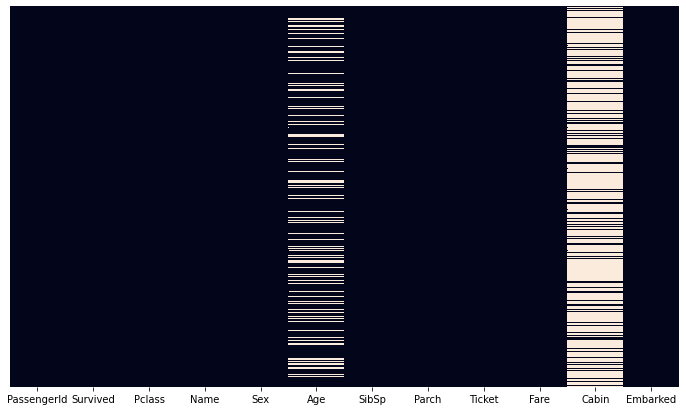

In [12]:
plt.figure(figsize=(12, 7)) #increase the size of graph.
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. 

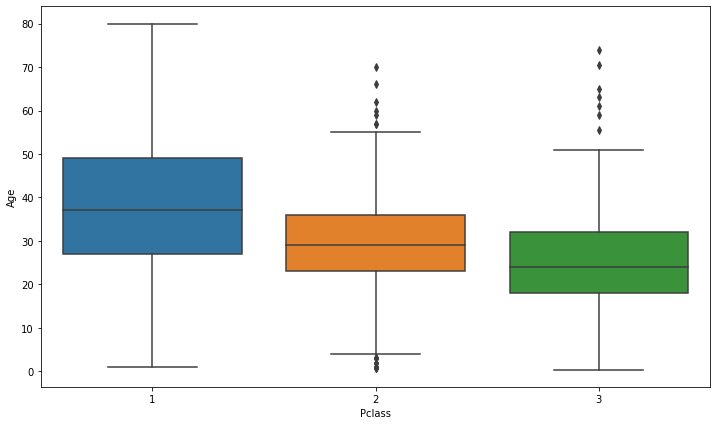

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic)

Overview of Column Age with respect to ticket class i.e Pclass column


lets find the average age of the passengers of each class

In [20]:
titanic[['Age','Pclass']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


We got Average Age of the Passengers based on the class of ticket


1.   We Can see That Passengers Having First Class Ticket are about 38 Years Old roughly.
2.   We Can see That Passengers Having Second Class Ticket are about 29 Years Old roughly.
3.   We Can see That Passengers Having Third Class Ticket are about 25 Years Old roughly.






I am going to use average of the age based on the ticket class to perform missing values imputation on age column.

In [29]:
def impute_Age(cols):    #the data from respective column i.e Age,Pclass will be passed here
  Age = cols[0]          #retrieve the value in age column 
  Pclass = cols[1]       #retrieve the value in Pclass column for determining class of ticket
  if pd.isnull(Age):     #if the value in the age is foun null at any record in age the it will execute
      if Pclass == 1:    #if the ticket class or Pclass is 1 the value of age will be 38
          return 38    
      elif Pclass == 2:  #if the ticket class or Pclass 2 is  the value of age will be 29
          return 29
      else:              #if the ticket class or Pclass is 3 the value of age will be 25
          return 25
  else:
      return Age         #if Value is not null the it will return the passed value without any modification.

The Above fucntion will fill the Missing value based on the average age of the passenger based on their class

In [30]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_Age,axis=1) #here the function Impute Age will be applied on each row of column Age.
 

The Apply Function will apply the function we developed on column Age. In above code Axis  Represents the Column.

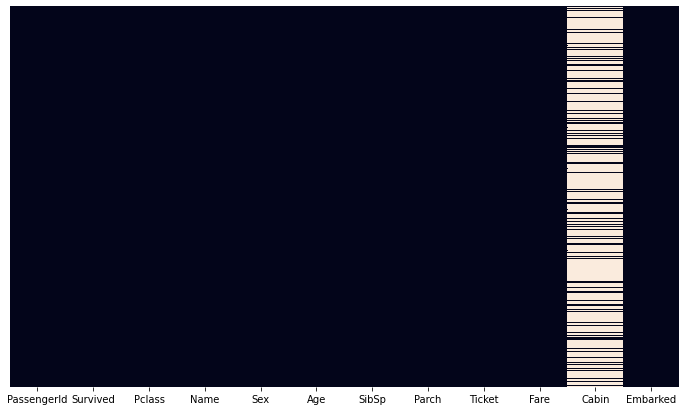

In [31]:
plt.figure(figsize=(12, 7)) #increase the size of graph.
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

As you can see in the above plot there are no longer null value Availabe in Column Age, After missing value imputation using average age based on pclass.

As the Column Cabin have too much of Missing valuees we will Simply Drop the Column.

In [33]:
titanic.drop('Cabin',axis=1,inplace=True) #inplace= true will reflect in the changes in main titanic dataframe.

In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


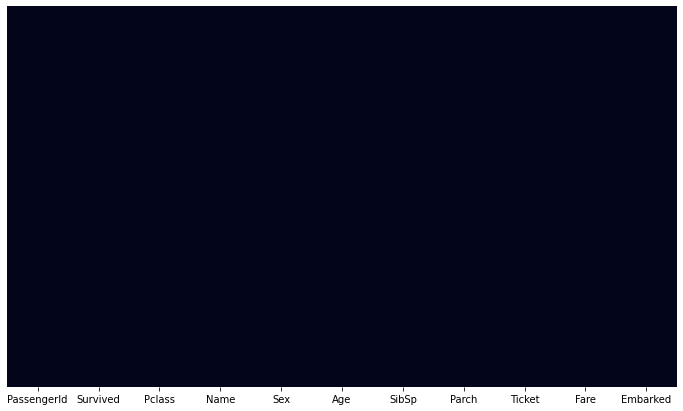

In [35]:
plt.figure(figsize=(12, 7)) #increase the size of graph.
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In the above heatmap Plot you can now see there are no missing values in the titanic dataframe.

In [36]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


Lets Export the Clean DataSet.


In [39]:
titanic.to_csv(r'/content/titanic_clean.csv', index = False)  #index is set to false as we dont need index column